In [109]:
import torch
import inspect
import torch.optim as optim
import torch.utils.data
import torch.nn.functional as F
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [196]:
def generator(z, parameters): 
    """
    Runs forward propagation on z and parameters.
    
    Arguments:
    z -- noise
    parameters -- neural net weights
    
    Returns:
    z -- output of last activation layer
    """
    z = z.t()
    z = parameters['W1'] @ z + parameters['b1']
    z = F.relu(z)
    z = parameters['W2'] @ z + parameters['b2']
    z = F.relu(z)
    z = parameters['W3'] @ z + parameters['b3']
    z = F.relu(z)
    return z.t()

In [197]:
X = torch.sort(torch.Tensor(16384, 1).uniform_(-1, 1), dim=0)[0]
Y = torch.sort(torch.Tensor(16384, 1).normal_(), dim=0)[0]
dataset = torch.utils.data.TensorDataset(X, Y, )
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)
parameters = {'W1': torch.nn.init.xavier_uniform_(torch.zeros((64,1), requires_grad=True)),
              'b1': torch.nn.init.xavier_uniform_(torch.zeros((64, 1), requires_grad=True)),
'W2': torch.nn.init.xavier_uniform_(torch.zeros((64,64), requires_grad=True)),
              'b2': torch.nn.init.xavier_uniform_(torch.zeros((64, 1), requires_grad=True)),
    'W3': torch.nn.init.xavier_uniform_(torch.zeros((1, 64),requires_grad=True)),
              'b3': torch.nn.init.xavier_uniform_(torch.zeros((1, 1), requires_grad=True)),
}
criterion = torch.nn.MSELoss()
optimizer = optim.Adam([theta_g])

In [198]:
for epoch in range(100):
    running_loss = 0.0
    optimizer.zero_grad() # Why...
    for batch_idx, data in enumerate(dataloader):
        inputs, labels = data
        outputs = generator(inputs, parameters)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        modulus = 500
        if (batch_idx % modulus == 0 and batch_idx > 0):
            print(F"Epoch: {epoch}, Batch: {batch_idx}, Loss: {running_loss/modulus}")
            running_loss = 0.0

Epoch: 0, Batch: 500, Loss: 1.0099876532554626
Epoch: 1, Batch: 500, Loss: 1.0081790161728859
Epoch: 2, Batch: 500, Loss: 1.0090901383757591
Epoch: 3, Batch: 500, Loss: 1.009838389158249
Epoch: 4, Batch: 500, Loss: 1.0083738174438477
Epoch: 5, Batch: 500, Loss: 1.010081649363041
Epoch: 6, Batch: 500, Loss: 1.0093683307170869
Epoch: 7, Batch: 500, Loss: 1.008346579492092
Epoch: 8, Batch: 500, Loss: 1.0106085485816
Epoch: 9, Batch: 500, Loss: 1.0115783071517945
Epoch: 10, Batch: 500, Loss: 1.0099775834083558
Epoch: 11, Batch: 500, Loss: 1.0100039891004562
Epoch: 12, Batch: 500, Loss: 1.0103229751586915
Epoch: 13, Batch: 500, Loss: 1.0067710070610045
Epoch: 14, Batch: 500, Loss: 1.007408028423786
Epoch: 15, Batch: 500, Loss: 1.0086628034114837
Epoch: 16, Batch: 500, Loss: 1.0092539191246033
Epoch: 17, Batch: 500, Loss: 1.0091418281197548
Epoch: 18, Batch: 500, Loss: 1.0070842928290367
Epoch: 19, Batch: 500, Loss: 1.0077803265452385
Epoch: 20, Batch: 500, Loss: 1.0121375247240068
Epoch: 21

KeyboardInterrupt: 

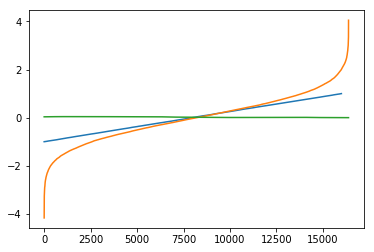

In [199]:
plot(z.numpy())
plot(y.numpy())
plot(generator(X, parameters).data.numpy())

In [75]:
def discriminator(x, theta_d): 
    #x:=input sample
    #theta_d:=neural net params
    #Returns scalar probability that x comes from data rather than generator

SyntaxError: unexpected EOF while parsing (<ipython-input-75-81eba2ed299d>, line 4)